# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.14 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
#env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return -lim, lim


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, dense1_size=128, dense2_size=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        "*** YOUR CODE HERE ***"
        #self.batchNorm = nn.BatchNorm1d(state_size)
        
        # input layer same as state size to fully connected hidden layer with relu activation
        self.dense1 = nn.Linear(state_size, dense1_size)
        #torch.nn.init.xavier_uniform_(self.dense1.weight)
        
        # to another fully connected hidden layer with relu activation
        self.dense2 = nn.Linear(dense1_size, dense2_size)
        #torch.nn.init.xavier_uniform_(self.dense2.weight)
        
        # to final fully connected layer same as action size with tanh activation        
        self.dense3 = nn.Linear(dense2_size, action_size)
        #torch.nn.init.xavier_uniform_(self.dense3.weight)
        self.reset_parameters()

    def reset_parameters(self):
        self.dense1.weight.data.uniform_(*hidden_init(self.dense1))
        self.dense2.weight.data.uniform_(*hidden_init(self.dense2))
        self.dense3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build a network that maps state -> actions."""
        #if state.dim() == 1:
        #    state = state.unsqueeze(0)
        #state = self.batchNorm(state)

        x = F.relu(self.dense1(state))
        x = F.relu(self.dense2(x))
        x = F.tanh(self.dense3(x))    # action must be between -1 and 1
        
        return x

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Critic(nn.Module):
    """Critic (Action Value) Model."""

    def __init__(self, state_size, action_size, seed, dense1_size=128, dense2_size=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        "*** YOUR CODE HERE ***"
        # input layer same as state size to fully connected hidden layer with relu activation
        #self.batchNorm = nn.BatchNorm1d(state_size)
        
        self.dense1 = nn.Linear(state_size, dense1_size)
        #torch.nn.init.xavier_uniform_(self.dense1.weight)
        
        # to another fully connected hidden layer with relu activation
        self.dense2 = nn.Linear(dense1_size + action_size, dense2_size)   # include actions in this layer
        #torch.nn.init.xavier_uniform_(self.dense2.weight)
        
        #self.dropout = nn.Dropout(0.2)
        
        # to final fully connected layer same as action size with linear activation        
        self.dense3 = nn.Linear(dense2_size, 1)    # all it returns is the action value
        #torch.nn.init.xavier_uniform_(self.dense3.weight)
        self.reset_parameters()

    def reset_parameters(self):
        self.dense1.weight.data.uniform_(*hidden_init(self.dense1))
        self.dense2.weight.data.uniform_(*hidden_init(self.dense2))
        self.dense3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):   # pass the action so it can be concatenated in 2nd hidden layer
        """Build a network that maps state -> action values."""
        #if state.dim() == 1:
        #    state = state.unsqueeze(0)
        #state = self.batchNorm(state)

        x = F.relu(self.dense1(state))
        #print("x.shape: ", x.shape)
        #print("action.shape: ", action.shape)
        x = torch.cat((x, action), dim=1)   # concatenate the output of 1st hidden layer with action
        
        x = F.relu(self.dense2(x))
        
        #x = self.dropout(x)
        
        x = self.dense3(x)     # linear output. No need to restrict action value       
        return x

In [9]:
import numpy as np
import random
from collections import namedtuple, deque
import copy

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4               # learning rate actor
LR_CRITIC = 3e-4               # learning rate critic
UPDATE_EVERY = 4        # how often to update the network (after every ? time steps)
UPDATE_TIMES = 1        # how many times do we update the network

WEIGHT_DECAY = 0.0        # L2 weight decay

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, num_agents, state_size, action_size, seed):
        """Initialize an Agent object.
        
        Params
        ======
            num_agents (int): number of agents
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.num_agents = num_agents
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Actor-Network
        self.actorNetwork_local = Actor(state_size, action_size, seed).to(device)
        self.actorNetwork_target = Actor(state_size, action_size, seed).to(device)
        self.actorNetwork_optimizer = optim.Adam(self.actorNetwork_local.parameters(), lr=LR_ACTOR)

        # Critic-Network
        self.criticNetwork_local = Critic(state_size, action_size, seed).to(device)
        self.criticNetwork_target = Critic(state_size, action_size, seed).to(device)
        self.criticNetwork_optimizer = optim.Adam(self.criticNetwork_local.parameters(), lr=LR_CRITIC, 
                                                  weight_decay=WEIGHT_DECAY)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)

        # Noise process
        #self.noise = OUNoise(action_size, seed)        
        self.noise = OUNoise((self.num_agents, action_size), seed)        
        
        # set target networks initial weights same as critic
        self.soft_update(self.criticNetwork_local, self.criticNetwork_target, 1)
        self.soft_update(self.actorNetwork_local, self.actorNetwork_target, 1)
    
    def step(self, states, actions, rewards, next_states, dones, timestep):
        # Save experience in replay memory
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        if len(self.memory) > BATCH_SIZE and timestep % UPDATE_EVERY == 0:
            # If enough samples are available in memory, get random subset and learn
            for _ in range(UPDATE_TIMES):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, states, epsilon=1):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            states (array_like): current state (num of agents x state size)
            there is no epsilon needed here because actions are continuous, not discrete
            add_noise (bool): flag to add noise to predicted actions during training
        """
        #actions = np.zeros((self.num_agents, self.action_size))
        
        self.actorNetwork_local.eval()    # switch to eval mode
        
        #for i, state in enumerate(states):   # one state vector per agent
        states = torch.from_numpy(states).float().to(device)
        with torch.no_grad():
            actions = self.actorNetwork_local(states).cpu().data.numpy()
            actions += epsilon*self.noise.sample()

        actions = np.clip(actions, -1, 1)
        
        self.actorNetwork_local.train()    # switch back to training mode
        
        return actions

    def reset_noise(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """

        states, actions, rewards, next_states, dones = experiences
        #print("actions: ", actions.data.size())

        # Update the critic network
        Qs = self.criticNetwork_local(states, actions)
        
        next_actions = self.actorNetwork_target(next_states)        
        Qns = self.criticNetwork_target(next_states, next_actions)

        TD_Target = rewards + gamma*Qns*(1-dones)   # multiply by (1-dones): Qmax_ns = 0 for terminal state

        critic_loss = F.mse_loss(Qs, TD_Target)
        
        self.criticNetwork_optimizer.zero_grad()
        critic_loss.backward()
        #torch.nn.utils.clip_grad_norm_(self.criticNetwork_local.parameters(), 1)
        self.criticNetwork_optimizer.step()
        
        # Update the actor network
        pred_actions = self.actorNetwork_local(states)
        actor_loss = -self.criticNetwork_local(states, pred_actions).mean()
        
        self.actorNetwork_optimizer.zero_grad()
        actor_loss.backward()
        #torch.nn.utils.clip_grad_norm_(self.actorNetwork_local.parameters(), 1)
        self.actorNetwork_optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.actorNetwork_local, self.actorNetwork_target, TAU)                     
        self.soft_update(self.criticNetwork_local, self.criticNetwork_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    #def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
    def __init__(self, size_tuple, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        #self.mu = mu * np.ones(size)
        self.mu = mu * np.ones(size_tuple)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.size_tuple = size_tuple
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        #dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        #dx = self.theta * (self.mu - x) + self.sigma * np.random.random(self.size_tuple)
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size_tuple)
        self.state = x + dx
        return self.state

In [10]:
def train_d4pgAgent(env, brain_name, agent, n_episodes=100, max_t=1000):
    """D4PG for continuous control.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decrement (float): subtractive factor (per episode) for decreasing epsilon
    """
    avgScores = []                        # list containing average scores over all agents from each episode
    avg_scores_window = deque(maxlen=100)  # last 100 average scores over all agents
    epsilon = 1.0
    epsilon_dec = 0
    envSolved = False

    for i_episode in range(1, n_episodes+1):
        agent.reset_noise()       
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
        
        states = env_info.vector_observations                  # get the current state (for each agent)
        for t in range(max_t):
            actions = agent.act(states, epsilon)    # num_agents x action_size

            env_info = env.step(actions)[brain_name]       # send the action to the environment
            next_states = env_info.vector_observations     # get the next states
            rewards = env_info.rewards                     # get the rewards
            dones = env_info.local_done                    # see if episodes have finished
            
            agent.step(states, actions, rewards, next_states, dones, t)
            
            states = next_states
            scores += rewards
            #if np.any(dones):
            #    break
        
        epsilon -= epsilon_dec
        
        avgScore = np.mean(scores)
        avg_scores_window.append(avgScore)       # save most recent average score over all agents
        avgScores.append(avgScore)              # save most recent average score over all agents
        
        avgScoreAllAgentsOver100Episodes = np.mean(avg_scores_window)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avgScoreAllAgentsOver100Episodes), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avgScoreAllAgentsOver100Episodes))
            torch.save(agent.actorNetwork_local.state_dict(), 'actorNetwork.pth')
            torch.save(agent.criticNetwork_local.state_dict(), 'criticNetwork.pth')
        
        if not envSolved and avgScoreAllAgentsOver100Episodes >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avgScoreAllAgentsOver100Episodes))
            envSolved = True
            #break
            
    return avgScores

In [11]:
import signal
 
from contextlib import contextmanager
 
import requests
 
 
DELAY = INTERVAL = 4 * 60  # interval time in seconds
MIN_DELAY = MIN_INTERVAL = 2 * 60
KEEPALIVE_URL = "https://nebula.udacity.com/api/v1/remote/keep-alive"
TOKEN_URL = "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token"
TOKEN_HEADERS = {"Metadata-Flavor":"Google"}
 
 
def _request_handler(headers):
    def _handler(signum, frame):
        requests.request("POST", KEEPALIVE_URL, headers=headers)
    return _handler
 
 
@contextmanager
def active_session(delay=DELAY, interval=INTERVAL):
    """
    Example:
 
    from workspace_utils import active_session
 
    with active_session():
        # do long-running work here
    """
    token = requests.request("GET", TOKEN_URL, headers=TOKEN_HEADERS).text
    headers = {'Authorization': "STAR " + token}
    delay = max(delay, MIN_DELAY)
    interval = max(interval, MIN_INTERVAL)
    original_handler = signal.getsignal(signal.SIGALRM)
    try:
        signal.signal(signal.SIGALRM, _request_handler(headers))
        signal.setitimer(signal.ITIMER_REAL, delay, interval)
        yield
    finally:
        signal.signal(signal.SIGALRM, original_handler)
        signal.setitimer(signal.ITIMER_REAL, 0)
 
 
def keep_awake(iterable, delay=DELAY, interval=INTERVAL):
    """
    Example:
 
    from workspace_utils import keep_awake
 
    for i in keep_awake(range(5)):
        # do iteration with lots of work here
    """
    with active_session(delay, interval): yield from iterable

Episode 100	Average Score: 2.38
Episode 195	Average Score: 30.12
Environment solved in 195 episodes!	Average Score: 30.12
Episode 200	Average Score: 31.51
Episode 300	Average Score: 37.62


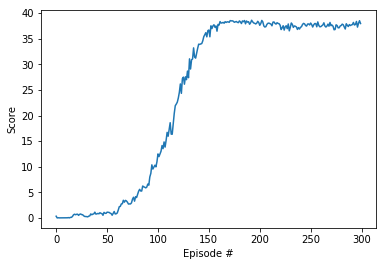

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=2)

with active_session():
    scores = train_d4pgAgent(env, brain_name, agent, 300, 1000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

# lets see how well our agent performs
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=0)

map_location='cpu'

# load the weights from file
agent.actorNetwork_local.load_state_dict(torch.load('actorNetwork.pth', map_location=map_location))
agent.criticNetwork_local.load_state_dict(torch.load('criticNetwork.pth', map_location=map_location))

avg_reward_window = deque(maxlen=100)  # last 100 average scores over all agents
for i in range(1000):
    actions = agent.act(states)                        # num_agents x action_size

    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    
    states = next_states                               # roll over states to next time step
    
    avgReward = np.mean(env_info.rewards)
    avg_reward_window.append(avgReward)       # save most recent average score over all agents

    print('\rStep: {}\tAverage Reward: {:.2f}'.format(i, avgReward), end="")
          
print('\rFinal Average Reward Over Last 100 Steps: {:.2f}'.format(np.mean(avg_reward_window)), end="")

Final Average Reward Over Last 100 Steps: 0.04

In [13]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 